# British Airways Review Scraping & Analysis

This project scrapes British Airway customer feedback from a third-party source, Skytrax and analyses this data to understand customer feelings and needs.

## Import Libraries

In [3]:
# pip install seaborn
!pip install nltk

In [4]:
# Importing Necessary Libraries

!pip install wordcloud

!pip install bs4
!pip install requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
# Import data cleaning libraries

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud

from nltk import bigrams, trigrams

from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Web scraping

I will use `BeautifulSoup` to scrape data on British Airway reviews from [https://www.airlinequality.com/airline-reviews/british-airways] into a '.csv' file for further analysis with python


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
page_total = 40
page_size = 100

customer_reviews,i = [],1

while i <= page_total:
    print(f"Scraping page {i}...")

    # Create URL for subsequent pages following base url
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Request data from page
    html_request = requests.get(url)

    #Parsing content
    parsed_data = BeautifulSoup(html_request.content, 'html.parser')
    customer_reviews.extend([el.get_text() for el in parsed_data.select('div.text_content')])

    print(f"  --> {len(customer_reviews)} total reviews")
    i += 1

Scraping page 1...
  --> 100 total reviews
Scraping page 2...
  --> 200 total reviews
Scraping page 3...
  --> 300 total reviews
Scraping page 4...
  --> 400 total reviews
Scraping page 5...
  --> 500 total reviews
Scraping page 6...
  --> 600 total reviews
Scraping page 7...
  --> 700 total reviews
Scraping page 8...
  --> 800 total reviews
Scraping page 9...
  --> 900 total reviews
Scraping page 10...
  --> 1000 total reviews
Scraping page 11...
  --> 1100 total reviews
Scraping page 12...
  --> 1200 total reviews
Scraping page 13...
  --> 1300 total reviews
Scraping page 14...
  --> 1400 total reviews
Scraping page 15...
  --> 1500 total reviews
Scraping page 16...
  --> 1600 total reviews
Scraping page 17...
  --> 1700 total reviews
Scraping page 18...
  --> 1800 total reviews
Scraping page 19...
  --> 1900 total reviews
Scraping page 20...
  --> 2000 total reviews
Scraping page 21...
  --> 2100 total reviews
Scraping page 22...
  --> 2200 total reviews
Scraping page 23...
  --> 23

In [ ]:
len(customer_reviews)

3938

In [ ]:
review_df = pd.DataFrame()
review_df["reviews"] = customer_reviews
review_df.head()

,reviews
0,✅ Trip Verified | We are extremely grateful ...
1,✅ Trip Verified | I had an appalling experie...
2,"Not Verified | Good points, the cabin crew, t..."
3,"Not Verified | It was a decent flight, reason..."
4,✅ Trip Verified | I really like flying Briti...


In [ ]:
# Saving the resulting dataframe to a csv file
review_df.to_csv("BA_reviews.csv")

## Data Cleaning & Preprocessing

In [3]:
review_df = pd.read_csv("BA_reviews.csv")
review_df.drop(columns=['Unnamed: 0'], inplace=True)
review_df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


The collected data contains purely text and string characters so would have to undergo cleaning and preprocessing

First, we will get rid of instances of '✅ Trip Verified', '✅ Verified Review', 'Not Verified' and 'Unverified'

In [5]:
review_df[review_df['reviews'].str.contains('verified', case=False, na=False)]

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...
...,...
2568,✅ Verified Review | Istanbul to London Heathr...
2569,✅ Verified Review | London Heathrow to Housto...
2570,✅ Verified Review | We have flown with Britis...
2571,✅ Verified Review | British Airways from Seat...


In [6]:
# Removing instances of 'verified'
review_df['reviews'] = review_df['reviews'].str.replace('Trip Verified', '')
review_df['reviews'] = review_df['reviews'].str.replace('Not Verified', '')
review_df['reviews'] = review_df['reviews'].str.replace('Verified Review', '')
review_df['reviews'] = review_df['reviews'].str.replace('Unverified', '')
review_df['reviews'] = review_df['reviews'].str.replace('✅', '')
review_df['reviews'] = review_df['reviews'].str.replace('|', '')
review_df.head()

,reviews
0,Flight mainly let down by a disagreeable ...
1,Another awful experience by British Airwa...
2,"The service was rude, full of attitude to..."
3,This flight was a joke. There was four pe...
4,This time British Airways managed to get ...


### Text Cleaning

In [7]:
def preprocess_text(text):

    # Convert text to lowercase
    text = text.lower()

    #Remove special characters
    # text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s\d]', '', text)

    return text

In [8]:
review_df['review_text_c'] = review_df['reviews'].apply(preprocess_text)

In [9]:
review_df.head()

,reviews,review_text_c
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...
1,Another awful experience by British Airwa...,another awful experience by british airwa...
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...
4,This time British Airways managed to get ...,this time british airways managed to get ...


### Tokenization

Setting up a function to preprocess the text

In [10]:
def tokenize(text):

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    return tokens

In [11]:
review_df['tokens'] = review_df['review_text_c'].apply(tokenize)

In [12]:
review_df.head()

,reviews,review_text_c,tokens
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl..."
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw..."
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ..."
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,..."
4,This time British Airways managed to get ...,this time british airways managed to get ...,"[this, time, british, airways, managed, to, ge..."


### Stopword Removal

In [13]:
# Removing stopwords except negating words

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    negations = ["no", "not", "don't", "didn't", "doesn't", "wasn't", "weren't", "shouldn't", "couldn't", "wouldn't", "isn't", "aren't", "haven't", "hasn't", "hadn't"]
    stop_words = stop_words - set(negations)
    clean_tokens = [word for word in tokens if word.lower() not in stop_words]
    return clean_tokens

In [14]:
review_df['clean_tokens'] = review_df['tokens'].apply(remove_stopwords)

In [15]:
review_df.head()

,reviews,review_text_c,tokens,clean_tokens
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at..."
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,..."
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ..."
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ..."
4,This time British Airways managed to get ...,this time british airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth..."


### Lemmatization

In [16]:
def word_stemming(tokens):
    stemmer = nltk.stem.WordNetLemmatizer()
    stemmed_tokens = [stemmer.lemmatize(token) for token in tokens]
    return stemmed_tokens

In [17]:
review_df['stemmed_tokens'] = review_df['clean_tokens'].apply(word_stemming)

In [18]:
review_df.head()

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at..."
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ..."
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ..."
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ..."
4,This time British Airways managed to get ...,this time british airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi..."


In [19]:
review_df.head()

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at..."
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ..."
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ..."
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ..."
4,This time British Airways managed to get ...,this time british airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi..."


## Data Visualization

To analyze the cleaned data, we will begin with a word cloud and work our way to bigrams

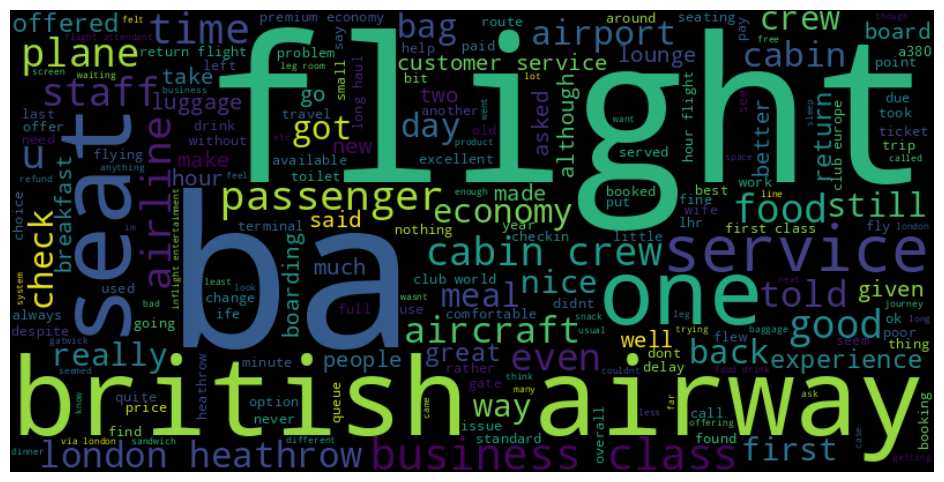

In [78]:
# Combine all cleaned words from the review into a single string
all_words = ' '.join([' '.join(tokens) for tokens in review_df['stemmed_tokens']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now we will try to see the most popular bigrams in our dataset

In [79]:
# Function to generate the most common bigrams

def generate_bigrams(tokens):
    return list(bigrams(tokens))

review_df['bigrams'] = review_df['stemmed_tokens'].apply(generate_bigrams)

all_bigrams = [bigram for sublist in review_df['bigrams'] for bigram in sublist]
bigram_counts = Counter(all_bigrams)

# Print the 10 most common bigrams
print(bigram_counts.most_common(20))


[(('british', 'airway'), 2188), (('business', 'class'), 1189), (('cabin', 'crew'), 929), (('london', 'heathrow'), 686), (('customer', 'service'), 525), (('premium', 'economy'), 396), (('club', 'world'), 396), (('return', 'flight'), 365), (('first', 'class'), 355), (('club', 'europe'), 320), (('hour', 'flight'), 309), (('could', 'not'), 268), (('long', 'haul'), 259), (('flight', 'attendant'), 252), (('leg', 'room'), 234), (('food', 'drink'), 233), (('via', 'london'), 213), (('inflight', 'entertainment'), 210), (('fly', 'ba'), 195), (('flight', 'delayed'), 194)]


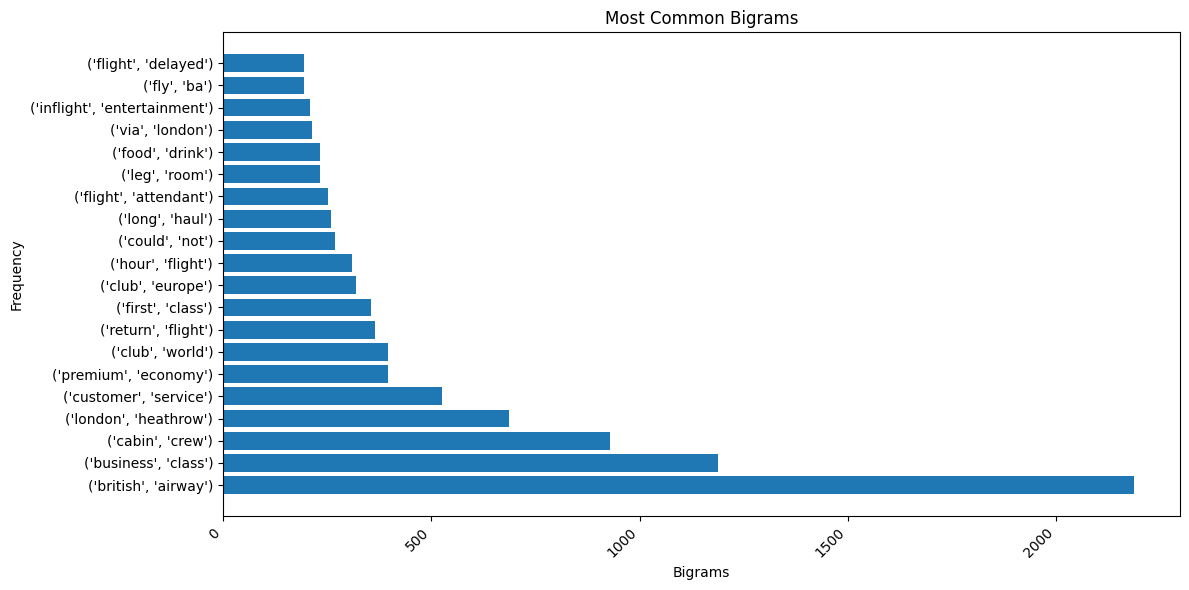

In [80]:
# Visualize the most common bigrams
most_common_bigrams = bigram_counts.most_common(20)

# Extract bigrams and their counts for plotting
bigrams_list = [bigram for bigram, count in most_common_bigrams]
counts_list_b = [count for bigram, count in most_common_bigrams]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh([str(bigram) for bigram in bigrams_list], counts_list_b)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Most Common Bigrams")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [81]:
# Function to generate the most common trigrams

def generate_trigrams(tokens):
    return list(trigrams(tokens))

review_df['trigrams'] = review_df['stemmed_tokens'].apply(generate_trigrams)

all_trigrams = [trigram for sublist in review_df['trigrams'] for trigram in sublist]
trigram_counts = Counter(all_trigrams)

# Print the 20 most common trigrams
print(trigram_counts.most_common(20))


[(('business', 'class', 'seat'), 110), (('british', 'airway', 'flight'), 99), (('flew', 'british', 'airway'), 99), (('long', 'haul', 'flight'), 87), (('world', 'traveller', 'plus'), 86), (('fly', 'british', 'airway'), 81), (('heathrow', 'british', 'airway'), 73), (('flight', 'british', 'airway'), 64), (('via', 'london', 'heathrow'), 58), (('flying', 'british', 'airway'), 56), (('british', 'airway', 'not'), 56), (('ba', 'customer', 'service'), 54), (('business', 'class', 'passenger'), 50), (('low', 'cost', 'airline'), 48), (('london', 'heathrow', 'british'), 48), (('london', 'british', 'airway'), 46), (('short', 'haul', 'flight'), 46), (('ba', 'business', 'class'), 45), (('british', 'airway', 'business'), 43), (('cabin', 'crew', 'friendly'), 42)]


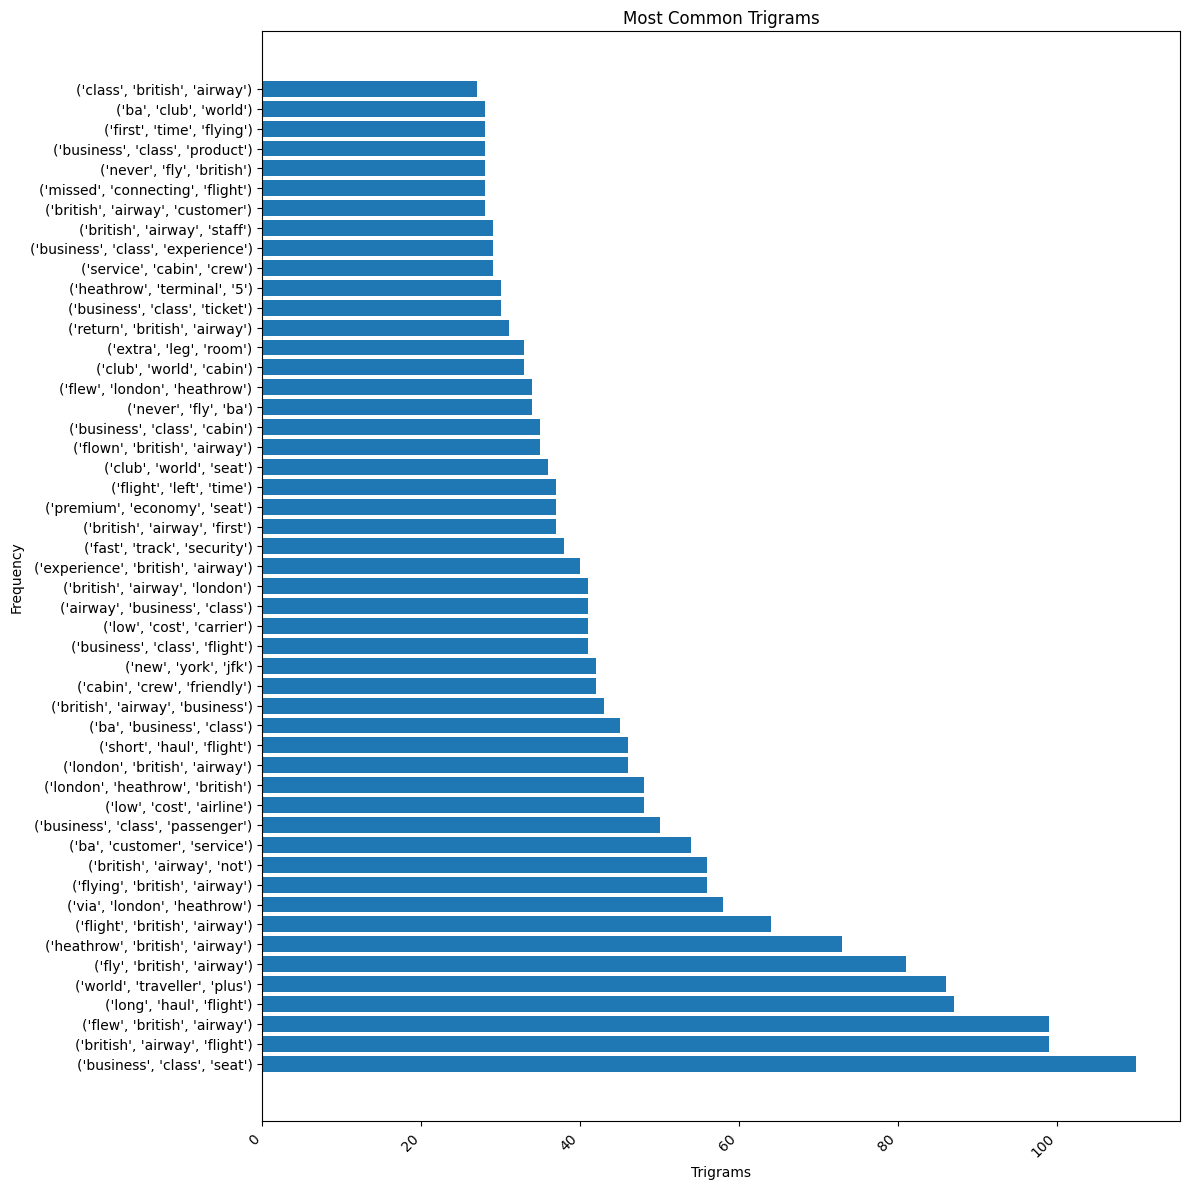

In [82]:
# Visualize the most common bigrams
most_common_trigrams = trigram_counts.most_common(50)

# Extract bigrams and their counts for plotting
trigrams_list = [trigram for trigram, count in most_common_trigrams]
counts_list_t = [count for trigram, count in most_common_trigrams]

# Create a bar plot
plt.figure(figsize=(12, 12))
plt.barh([str(trigram) for trigram in trigrams_list], counts_list_t)
plt.xlabel("Trigrams")
plt.ylabel("Frequency")
plt.title("Most Common Trigrams")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Topic modelling
---

For further analysis, I will categorize the reviews into very common categories: customer service, delay, food, seating, entertainment, luggage, wifi, check-in

In [49]:
# !pip install transformers torch pandas tqdm

from transformers import pipeline
from tqdm import tqdm

To ensure all bases are covered, I will set up 2 classifiers:
* Zero-shot classifier which will be the main classifier
* Rule-based classifier as a fallback incase the ain classifier does not assign any categories



In [50]:
#Define categories
categories = ["customer service",
              "booking and refund experience",
              "flight delays and cancellations",
              "in-flight meal",
              "seat comfort",
              "entertainment and wifi",
              "luggage",
              "check-in process",
              "Overall experience and service quality"]
threshold = 0.45

In [51]:
# Setting up rule based classifier
fallback_keywords = {
    "customer service": ["rude", "attendant", "staff", "service", "hung up", "cabin crew", "flight crew", "crew"],
    "flight delays and cancellations": ["delayed", "late", "waiting", "cancelled"],
    "in-flight meal": ["food", "meal", "snack", "dinner", "breakfast", "prosecco", 'water'],
    "seat comfort": ["seat", "legroom", "uncomfortable"],
    "entertainment and wifi": ["entertainment", "movies", "screen", "wifi", "internet", "connection", "IFE"],
    "check-in process": ["check-in", "boarding", "gate"],
    "luggage": ["baggage", "luggage", "suitcase", "bag"],
    "booking and refund experience": ["vouchers", "refund", "payment issues", "ticket discount", "apply credit"]
}

def rule_based_classify(text):
    labels_found = []
    for label, keywords in fallback_keywords.items():
        for kw in keywords:
            if re.search(rf"\b{re.escape(kw)}", text.lower()):
                labels_found.append(label)
                break
    return labels_found

In [52]:
# Set up the zero-shot classifier
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Classification function
def classify_to_columns(text):
    result = classifier(text, candidate_labels=categories, multi_label=True)
    label_scores = dict(zip(result['labels'], result['scores']))
    final_cat = {label: int(label_scores.get(label, 0) > threshold) for label in categories}

    if sum(final_cat.values()) == 0:
        fallback_labels = rule_based_classify(text)
        final_cat = {label: int(label in fallback_labels) for label in categories}

    return final_cat

Device set to use cuda:0


In [53]:
# Apply with progress bar
tqdm.pandas()
category_df = review_df["review_text_c"].progress_apply(classify_to_columns).apply(pd.Series)

100%|██████████| 3924/3924 [31:07<00:00,  2.10it/s]


In [58]:
category_df.head()

,customer service,booking and refund experience,flight delays and cancellations,in-flight meal,seat comfort,entertainment and wifi,luggage,check-in process,Overall experience and service quality
0,1,0,1,1,1,1,1,1,1
1,1,0,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1
4,1,0,0,1,1,1,0,0,1


Now we will merge the newly created category dataframe with the original review dataframe and dave this to a json file to preserve the data types

In [84]:
# Merge category columns into original DataFrame
review_df = pd.concat([review_df, category_df], axis=1)

# Save the result
review_df.to_json("categorized_reviews_binary.json", orient="records", lines=True)

# Preview the first few rows
review_df.head()

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,in-flight meal,seat comfort,entertainment and wifi,luggage,check-in process,Overall experience and service quality
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[(flight, mainly), (mainly, let), (let, disagr...","[(flight, mainly, let), (mainly, let, disagree...",1,0,1,1,1,1,1,1,1
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[(another, awful), (awful, experience), (exper...","[(another, awful, experience), (awful, experie...",1,0,1,0,0,0,0,0,1
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[(service, rude), (rude, full), (full, attitud...","[(service, rude, full), (rude, full, attitude)...",1,0,0,1,0,0,0,0,1
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ...","[(flight, joke), (joke, four), (four, people),...","[(flight, joke, four), (joke, four, people), (...",1,0,1,0,0,0,0,0,1
4,This time British Airways managed to get ...,this time british airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi...","[(time, british), (british, airway), (airway, ...","[(time, british, airway), (british, airway, ma...",1,0,0,1,1,1,0,0,1


Reloading the dataset for further analysis

In [145]:
review_df = pd.read_json("categorized_reviews_binary.json", orient='records', lines=True)
review_df.head(3)

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,in-flight meal,seat comfort,entertainment and wifi,luggage,check-in process,Overall experience and service quality
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[[flight, mainly], [mainly, let], [let, disagr...","[[flight, mainly, let], [mainly, let, disagree...",1,0,1,1,1,1,1,1,1
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[[another, awful], [awful, experience], [exper...","[[another, awful, experience], [awful, experie...",1,0,1,0,0,0,0,0,1
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[[service, rude], [rude, full], [full, attitud...","[[service, rude, full], [rude, full, attitude]...",1,0,0,1,0,0,0,0,1


In [146]:
review_df['review_text_c'] = review_df['review_text_c'].str.replace('\xa0', ' ', regex=False)

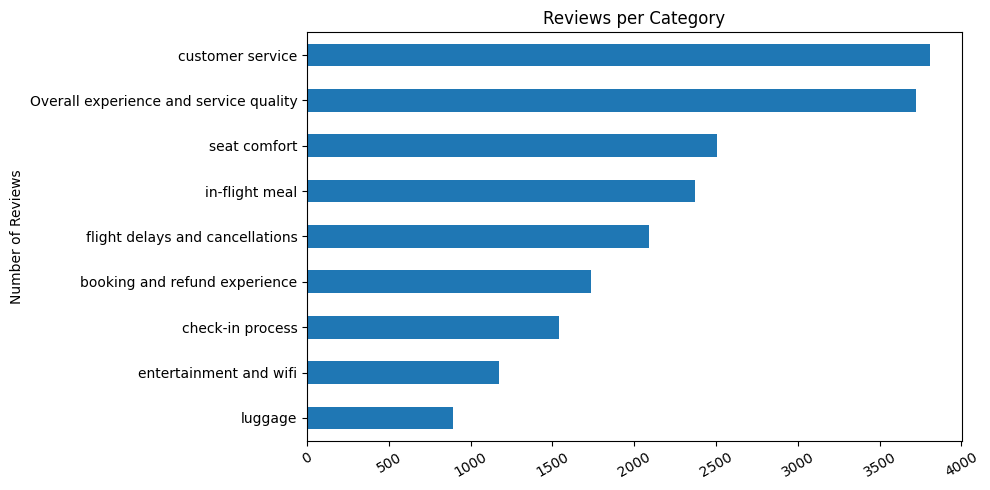

In [156]:
categories_cols = ["customer service",
              "booking and refund experience",
              "flight delays and cancellations",
              "in-flight meal",
              "seat comfort",
              "entertainment and wifi",
              "luggage",
              "check-in process",
              "Overall experience and service quality"]

# Display the number of reviews per category
review_df[categories_cols].sum().sort_values(ascending=True).plot(kind='barh', figsize=(10, 5))
plt.title('Reviews per Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('cat_count.png')
plt.show()

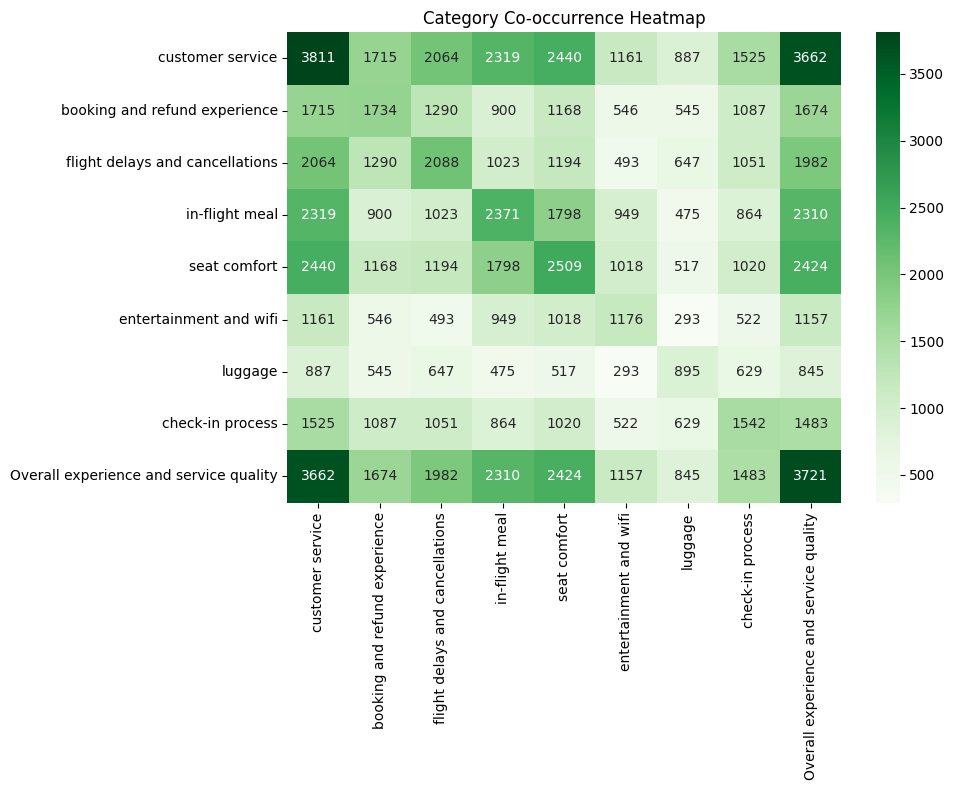

In [159]:
co_occurrence = review_df[categories_cols].T.dot(review_df[categories_cols])
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='Greens')
plt.title('Category Co-occurrence Heatmap')
plt.tight_layout()
plt.savefig('co-occurence matrix.png')
plt.show()


From just the assignment of categories, we can see what aspects of the experience has a larger impact on the customer
* Customers have more to say about customer service, seat comfort and flight delays than anything else
* Reviews about customer service also highlighted overall flight experience indicating that the interactions between customers and cabin crew is crucial for customer satisfaction.

## Sentiment Analysis using Vader

In [22]:
# Importing sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
# Improving the lexicon by adding domain focused lexicon
airline_lexicon = {
     "delay": -2,
     "late": -2,
     "cancellation": -3,
     "rude staff": -2.5,
     "lost baggage": -3,
     "comfortable seats": 2,
     "excellent service": 3,
     "turbulence": -1.5,
}

In [24]:
sentiments = SentimentIntensityAnalyzer()
sentiments.lexicon.update(airline_lexicon)

In [25]:
tqdm.pandas()

polarity_scores=review_df['review_text_c'].progress_apply(lambda x: sentiments.polarity_scores(x))

  0%|          | 0/3924 [00:00<?, ?it/s]

In [26]:
# Convert to dataframe
pol_df = pd.DataFrame(polarity_scores.tolist())
review_df = pd.concat([review_df, pol_df], axis=1)

In [27]:
review_df = review_df.rename(columns={
    'neg': 'neg_vader',
    'neu': 'neu_vader',
    'pos': 'pos_vader',
    'compound': 'compound_vader'
})

In [28]:
# Let's assign sentiments
review_df['Sentiments_vader'] = review_df['compound_vader'].apply(lambda x: 'Positive' if  x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))
review_df.head(3)

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,...,seat comfort,entertainment and wifi,luggage,check-in process,Overall experience and service quality,neg_vader,neu_vader,pos_vader,compound_vader,Sentiments_vader
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[[flight, mainly], [mainly, let], [let, disagr...","[[flight, mainly, let], [mainly, let, disagree...",1,0,1,...,1,1,1,1,1,0.123,0.801,0.076,-0.8765,Negative
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[[another, awful], [awful, experience], [exper...","[[another, awful, experience], [awful, experie...",1,0,1,...,0,0,0,0,1,0.289,0.711,0.000,-0.8294,Negative
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[[service, rude], [rude, full], [full, attitud...","[[service, rude, full], [rude, full, attitude]...",1,0,0,...,0,0,0,0,1,0.107,0.893,0.000,-0.4588,Negative


In [29]:
# Save the result
review_df.to_json("reviews_with_vader.json", orient="records", lines=True)

### Visualization

Let's see the distribution of sentiments across all reviews

In [101]:
# First reload saved data
review_df = pd.read_json("reviews_with_vader.json", orient='records', lines=True)
review_df.head(3)

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,...,seat comfort,entertainment and wifi,luggage,check-in process,Overall experience and service quality,neg_vader,neu_vader,pos_vader,compound_vader,Sentiments_vader
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[[flight, mainly], [mainly, let], [let, disagr...","[[flight, mainly, let], [mainly, let, disagree...",1,0,1,...,1,1,1,1,1,0.123,0.801,0.076,-0.8765,Negative
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[[another, awful], [awful, experience], [exper...","[[another, awful, experience], [awful, experie...",1,0,1,...,0,0,0,0,1,0.289,0.711,0.000,-0.8294,Negative
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[[service, rude], [rude, full], [full, attitud...","[[service, rude, full], [rude, full, attitude]...",1,0,0,...,0,0,0,0,1,0.107,0.893,0.000,-0.4588,Negative


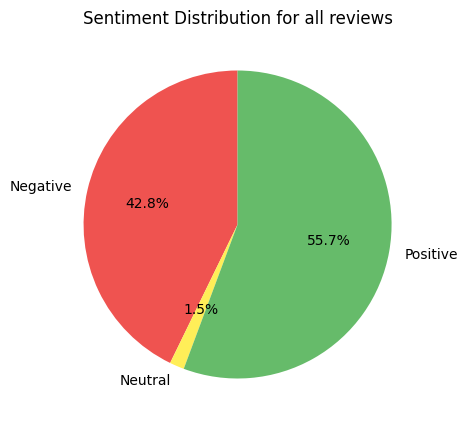

In [102]:
plt.figure(figsize=(5,5))
plt.pie(review_df['Sentiments_vader']. value_counts().sort_index(), labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', colors=['#ef5350', '#ffee58', '#66bb6a'], startangle=90)
plt.title('Sentiment Distribution for all reviews')
plt.show()

Now we'd view the distribution broken down by category

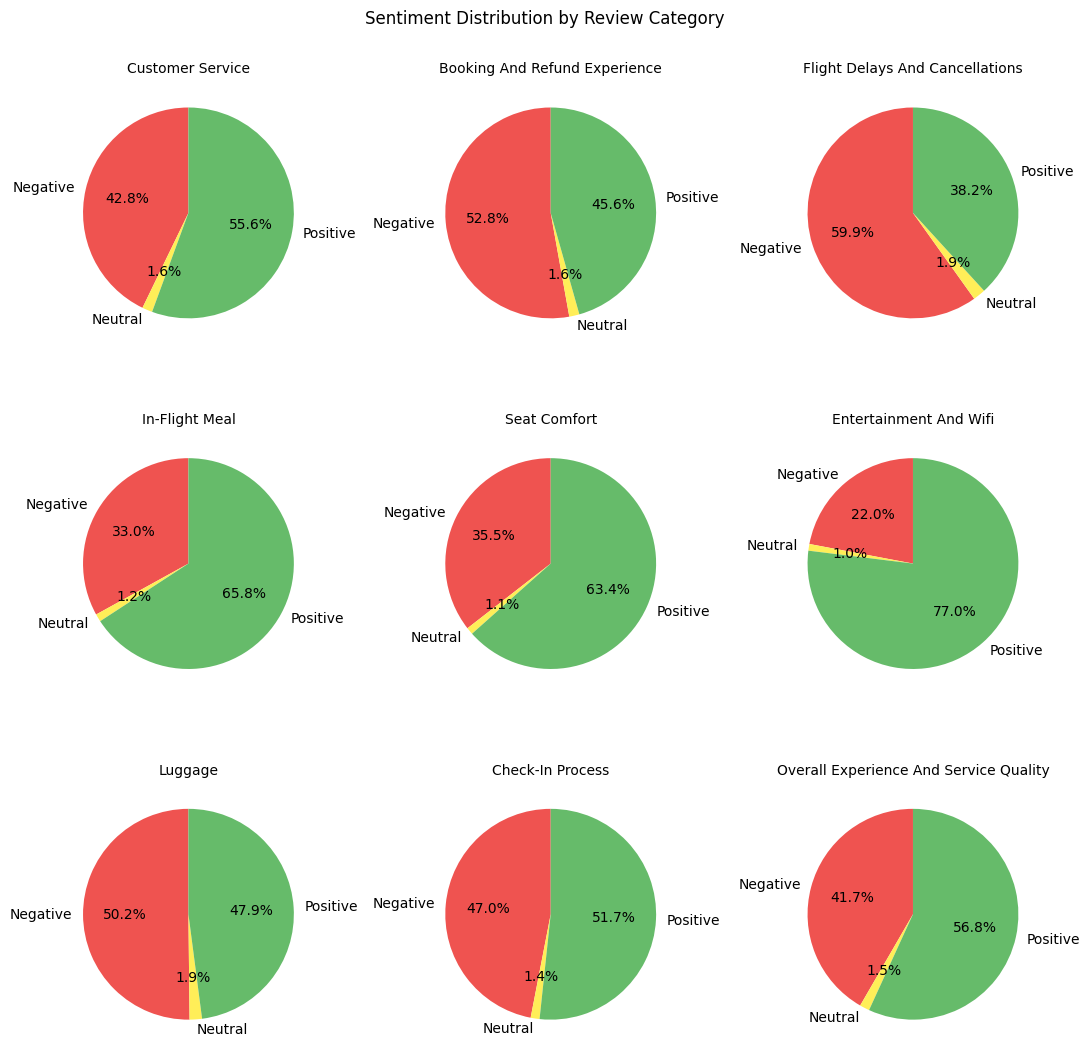

In [103]:
fig, axs = plt.subplots(3,3, figsize=(11,11))
axs = axs.flatten()

for i, cat in enumerate(categories_cols):

    count_of_Sentiments = review_df[review_df[cat]==1]['Sentiments_vader'].value_counts().sort_index()
    
    axs[i].pie(
        count_of_Sentiments,
        labels = count_of_Sentiments.index,
        autopct='%1.1f%%',
        colors=['#ef5350', '#ffee58', '#66bb6a'],
        startangle=90)
    axs[i].set_title(cat.title(), fontsize=10)
plt.suptitle('Sentiment Distribution by Review Category')
plt.tight_layout()
plt.show()

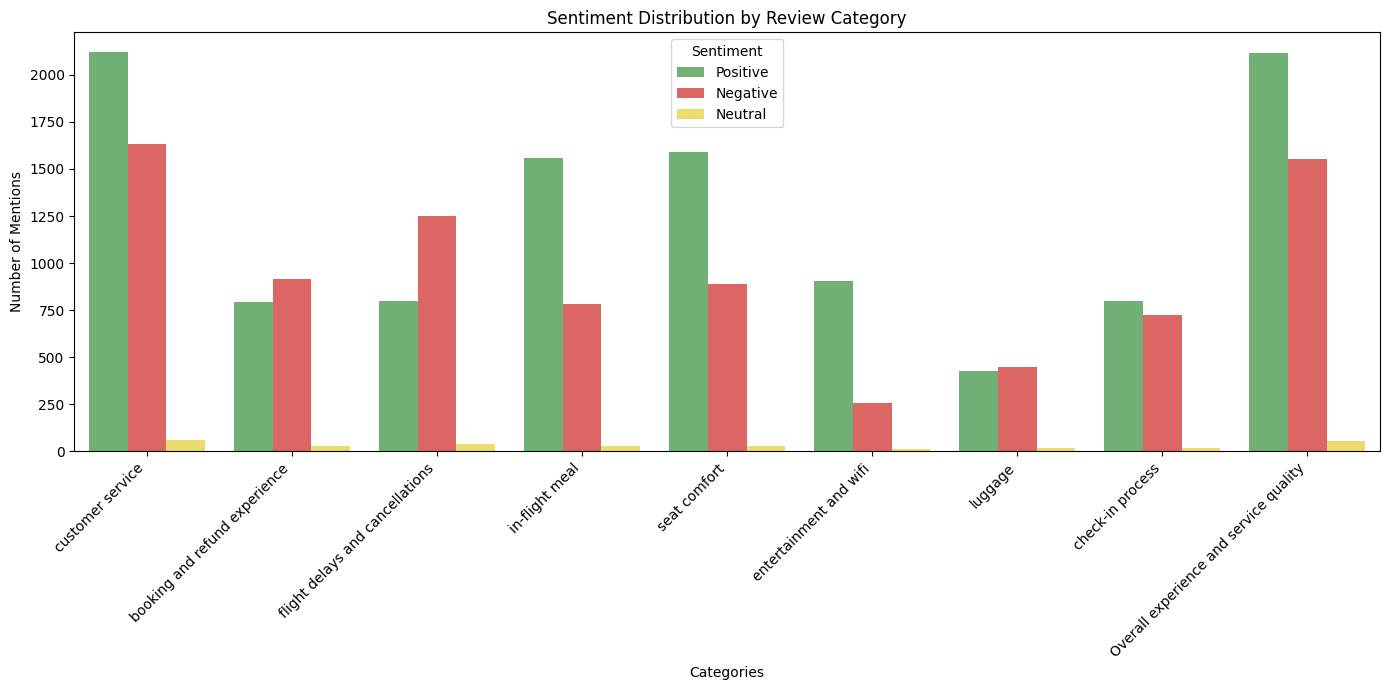

In [104]:
# Create a long-form DataFrame (aspect, sentiment)
records = []

for cat in categories_cols:
    subset = review_df[review_df[cat] == 1]
    counts = subset['Sentiments_vader'].value_counts()
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        records.append({
            'Aspect': cat,
            'Sentiment': sentiment,
            'Count': counts.get(sentiment, 0)
        })

grouped_df = pd.DataFrame(records)

# Plot grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped_df,
    x='Aspect',
    y='Count',
    hue='Sentiment',
    palette={'Positive': '#66bb6a', 'Neutral': '#ffee58', 'Negative': '#ef5350'}
)

plt.title('Sentiment Distribution by Review Category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Mentions')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


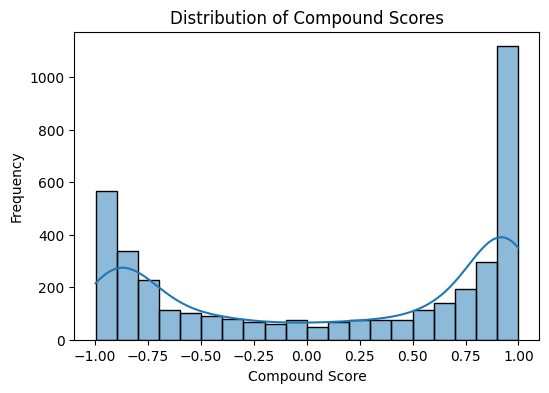

In [105]:
# Plot compound score distribution

plt.figure(figsize=(6, 4))
sns.histplot(review_df['compound_vader'], bins=20, kde=True)
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


## Sentiment Analysis with Roberta

In [106]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [36]:
# Load the model
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [37]:
# Write a function to extract polarity scores from roberta

def polarity_scores_r(review):
    encoded_text = tokenizer(review, padding='max_length', truncation=True, max_length=512, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'neg_r': scores[0],
        'neu_r': scores[1],
        'pos_r': scores[2]
    }
    return scores_dict

In [38]:
tqdm.pandas()

roberta_scores = review_df['review_text_c'].progress_apply(lambda x: polarity_scores_r(x))

  0%|          | 0/3924 [00:00<?, ?it/s]

In [39]:
roberta_scores

0       {'neg_r': 0.40641606, 'neu_r': 0.3818131, 'pos...
1       {'neg_r': 0.9808164, 'neu_r': 0.016890135, 'po...
2       {'neg_r': 0.97515327, 'neu_r': 0.022619668, 'p...
3       {'neg_r': 0.9111573, 'neu_r': 0.07946091, 'pos...
4       {'neg_r': 0.0034140623, 'neu_r': 0.025757741, ...
                              ...                        
3919    {'neg_r': 0.08679349, 'neu_r': 0.26886156, 'po...
3920    {'neg_r': 0.007394664, 'neu_r': 0.10464879, 'p...
3921    {'neg_r': 0.30096874, 'neu_r': 0.4852294, 'pos...
3922    {'neg_r': 0.0017797501, 'neu_r': 0.013985409, ...
3923    {'neg_r': 0.6202122, 'neu_r': 0.3042455, 'pos_...
Name: review_text_c, Length: 3924, dtype: object

In [96]:
# A quick assignment of sentiments
for row in roberta_scores:
    row.update({'Sentiment_roberta':max(row, key=row.get)})

In [108]:
# Convert to dataframe
rob_df = pd.DataFrame(roberta_scores.tolist())
review_df = pd.concat([review_df, rob_df], axis=1)

In [109]:
rob_df.head()

,neg_r,neu_r,pos_r,Sentiment_roberta
0,0.406416,0.381813,0.211771,neg_r
1,0.980816,0.016890,0.002293,neg_r
2,0.975153,0.022620,0.002227,neg_r
3,0.911157,0.079461,0.009382,neg_r
4,0.003414,0.025758,0.970828,pos_r


In [110]:
review_df.head(3)

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,...,Overall experience and service quality,neg_vader,neu_vader,pos_vader,compound_vader,Sentiments_vader,neg_r,neu_r,pos_r,Sentiment_roberta
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[[flight, mainly], [mainly, let], [let, disagr...","[[flight, mainly, let], [mainly, let, disagree...",1,0,1,...,1,0.123,0.801,0.076,-0.8765,Negative,0.406416,0.381813,0.211771,neg_r
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[[another, awful], [awful, experience], [exper...","[[another, awful, experience], [awful, experie...",1,0,1,...,1,0.289,0.711,0.000,-0.8294,Negative,0.980816,0.016890,0.002293,neg_r
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[[service, rude], [rude, full], [full, attitud...","[[service, rude, full], [rude, full, attitude]...",1,0,0,...,1,0.107,0.893,0.000,-0.4588,Negative,0.975153,0.022620,0.002227,neg_r


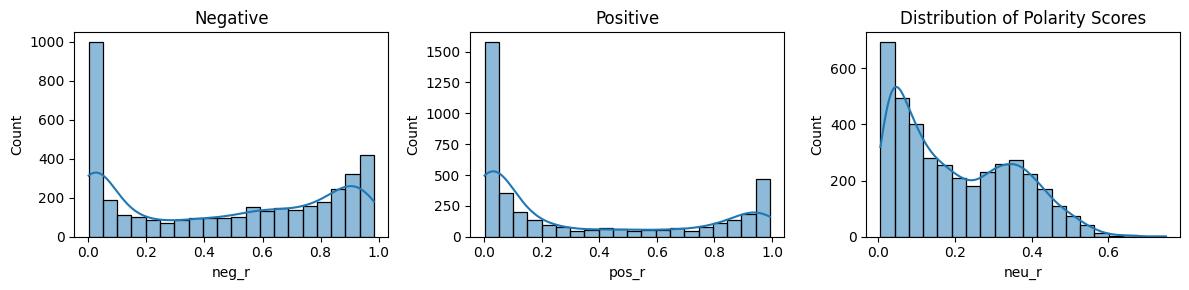

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(review_df['neg_r'], bins=20, kde=True, ax=axs[0])
sns.histplot(review_df['pos_r'], bins=20, kde=True, ax=axs[1])
sns.histplot(review_df['neu_r'], bins=20, kde=True, ax=axs[2])
axs[1].set_title('Positive')
axs[2].set_title('Neutral')
axs[0].set_title('Negative')
plt.tight_layout()
plt.title('Distribution of Polarity Scores')
# plt.xlabel('Compound Score')
# plt.ylabel('Frequency')
plt.show()

In [112]:
# Save the result
review_df.to_json("reviews_with_roberta.json", orient="records", lines=True)

### Visualization

Let us classify each sentiment into a negative, positive or neutral sentiment

In [118]:
# First reload saved data
review_df = pd.read_json("reviews_with_roberta.json", orient='records', lines=True)

In [120]:
#rename the roberta sentiments
review_df['Sentiment_roberta'] = review_df['Sentiment_roberta'].replace({'neg_r':'Negative',
                                                                        'pos_r':'Positive',
                                                                        'neu_r': 'Neutral'})
review_df.head(5)

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,...,Overall experience and service quality,neg_vader,neu_vader,pos_vader,compound_vader,Sentiments_vader,neg_r,neu_r,pos_r,Sentiment_roberta
0,Flight mainly let down by a disagreeable ...,flight mainly let down by a disagreeable ...,"[flight, mainly, let, down, by, a, disagreeabl...","[flight, mainly, let, disagreeable, flight, at...","[flight, mainly, let, disagreeable, flight, at...","[[flight, mainly], [mainly, let], [let, disagr...","[[flight, mainly, let], [mainly, let, disagree...",1,0,1,...,1,0.123,0.801,0.076,-0.8765,Negative,0.406416,0.381813,0.211771,Negative
1,Another awful experience by British Airwa...,another awful experience by british airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[[another, awful], [awful, experience], [exper...","[[another, awful, experience], [awful, experie...",1,0,1,...,1,0.289,0.711,0.000,-0.8294,Negative,0.980816,0.016890,0.002293,Negative
2,"The service was rude, full of attitude to...",the service was rude full of attitude to ...,"[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[[service, rude], [rude, full], [full, attitud...","[[service, rude, full], [rude, full, attitude]...",1,0,0,...,1,0.107,0.893,0.000,-0.4588,Negative,0.975153,0.022620,0.002227,Negative
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ...","[[flight, joke], [joke, four], [four, people],...","[[flight, joke, four], [joke, four, people], [...",1,0,1,...,1,0.061,0.857,0.082,0.0000,Neutral,0.911157,0.079461,0.009382,Negative
4,This time British Airways managed to get ...,this time british airways managed to get ...,"[this, time, british, airways, managed, to, ge...","[time, british, airways, managed, get, everyth...","[time, british, airway, managed, get, everythi...","[[time, british], [british, airway], [airway, ...","[[time, british, airway], [british, airway, ma...",1,0,0,...,1,0.000,0.767,0.233,0.9831,Positive,0.003414,0.025758,0.970828,Positive


In [122]:
review_df.iloc[3].reviews

'     This flight was a joke. There was four people in business class including myself and my companion. The service was outrageous. The crew was too busy flirting with the captain and where she was going for the day off, instead of paying attention in the cabin. '

In [124]:
review_df['Sentiment_roberta'].value_counts()

Sentiment_roberta
Negative    2128
Positive    1364
Neutral      432
Name: count, dtype: int64

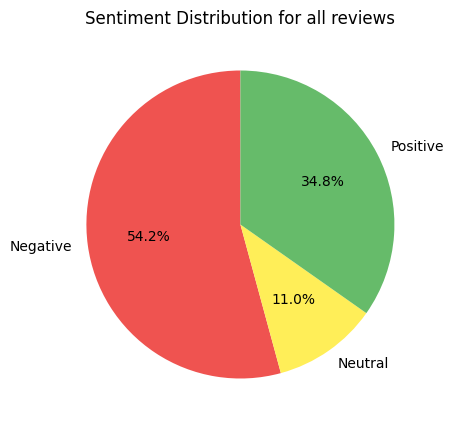

In [143]:
plt.figure(figsize=(5,5))
plt.pie(review_df['Sentiment_roberta'].value_counts().sort_index(), labels=['Negative', 'Neutral', 'Positive'], autopct='%1.1f%%', colors=['#ef5350', '#ffee58', '#66bb6a'], startangle=90)
plt.title('Sentiment Distribution for all reviews')
plt.savefig('Sentiment distribution')
plt.show()

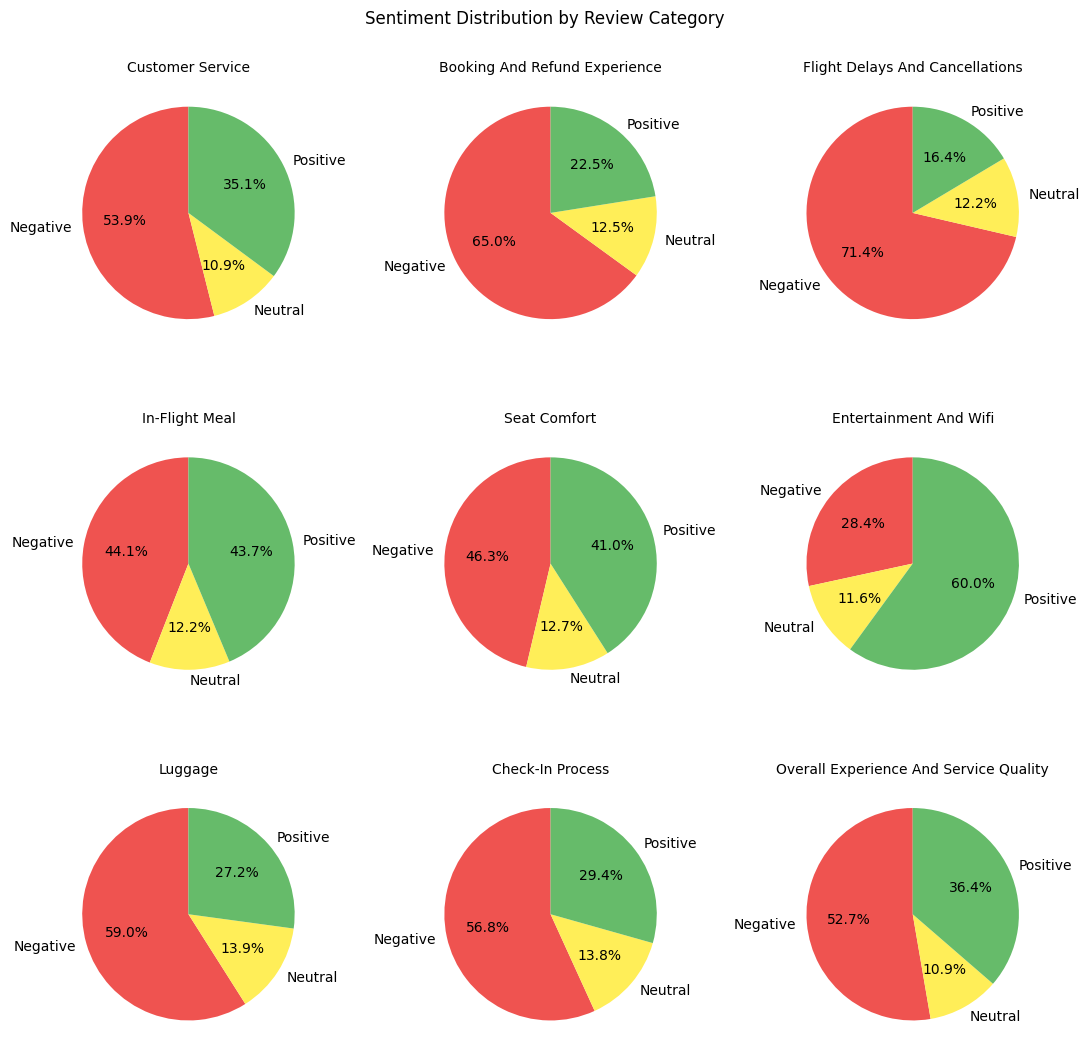

In [125]:
fig, axs = plt.subplots(3,3, figsize=(11,11))
axs = axs.flatten()

for i, cat in enumerate(categories_cols):
    count_of_Sentiments = review_df[review_df[cat]==1]['Sentiment_roberta'].value_counts().sort_index()  
    axs[i].pie(
        count_of_Sentiments,
        labels = count_of_Sentiments.index,
        autopct='%1.1f%%',
        colors=['#ef5350', '#ffee58', '#66bb6a'],
        startangle=90)
    axs[i].set_title(cat.title(), fontsize=10)
plt.suptitle('Sentiment Distribution by Review Category')
plt.tight_layout()
plt.show()

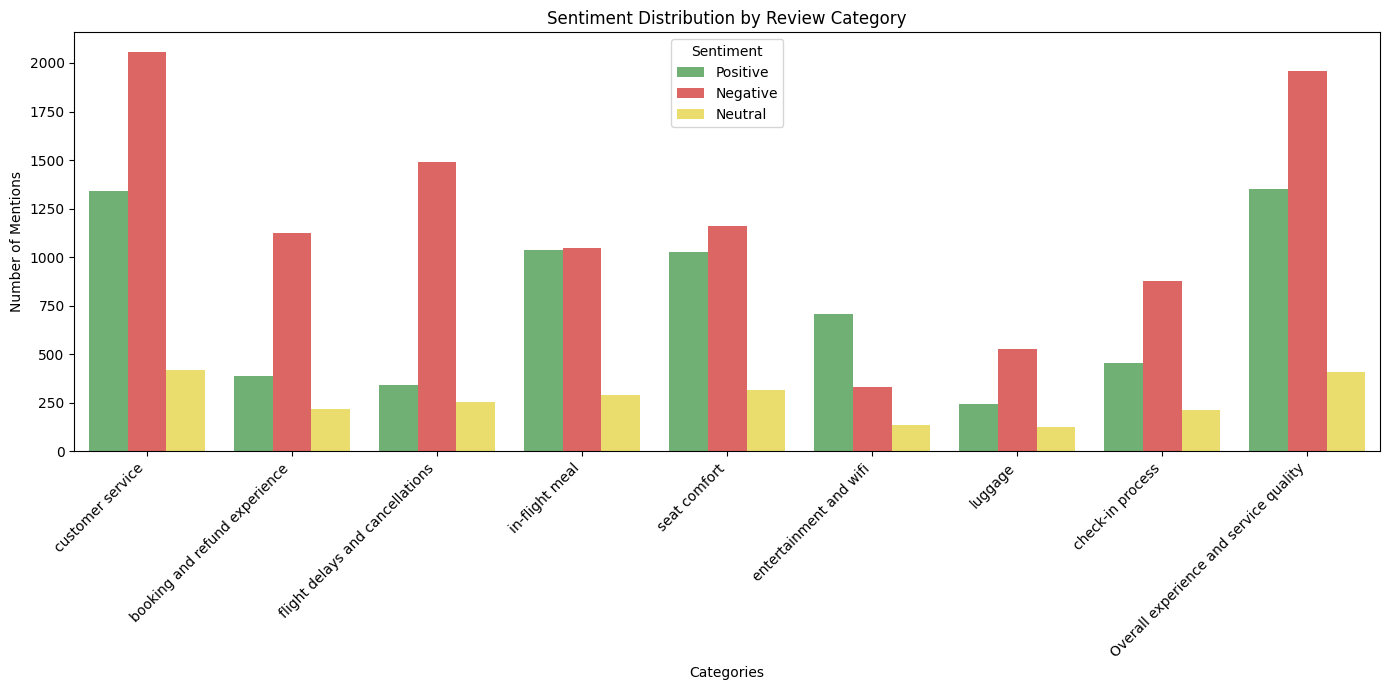

In [144]:
# Create a long-form DataFrame (aspect, sentiment)
records = []

for cat in categories_cols:
    subset = review_df[review_df[cat] == 1]
    counts = subset['Sentiment_roberta'].value_counts()
    for sentiment in ['Positive', 'Negative', 'Neutral']:
        records.append({
            'Aspect': cat,
            'Sentiment': sentiment,
            'Count': counts.get(sentiment, 0)
        })

grouped_df = pd.DataFrame(records)

# Plot grouped bar chart
plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped_df,
    x='Aspect',
    y='Count',
    hue='Sentiment',
    palette={'Positive': '#66bb6a', 'Neutral': '#ffee58', 'Negative': '#ef5350'}
)

plt.title('Sentiment Distribution by Review Category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Categories')
plt.ylabel('Number of Mentions')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.savefig('Sentiment Distribution by category')
plt.show()


From the comparison, we can see that
* The roberta model has a higher number of negative reviews than the vader model
* In almost 4000 reviews, both models align on sentiments for 2850 of them

In [133]:
review_df[~(review_df['Sentiments_vader']==review_df['Sentiment_roberta'])]

,reviews,review_text_c,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delays and cancellations,...,Overall experience and service quality,neg_vader,neu_vader,pos_vader,compound_vader,Sentiments_vader,neg_r,neu_r,pos_r,Sentiment_roberta
3,This flight was a joke. There was four pe...,this flight was a joke there was four peo...,"[this, flight, was, a, joke, there, was, four,...","[flight, joke, four, people, business, class, ...","[flight, joke, four, people, business, class, ...","[[flight, joke], [joke, four], [four, people],...","[[flight, joke, four], [joke, four, people], [...",1,0,1,...,1,0.061,0.857,0.082,0.0000,Neutral,0.911157,0.079461,0.009382,Negative
9,"First the good news, the club suites are su...",first the good news the club suites are suc...,"[first, the, good, news, the, club, suites, ar...","[first, good, news, club, suites, huge, improv...","[first, good, news, club, suite, huge, improve...","[[first, good], [good, news], [news, club], [c...","[[first, good, news], [good, news, club], [new...",1,0,0,...,1,0.046,0.786,0.168,0.9437,Positive,0.521663,0.331643,0.146695,Negative
20,After an excellent flight on a 777 CPT to...,after an excellent flight on a 777 cpt to...,"[after, an, excellent, flight, on, a, 777, cpt...","[excellent, flight, 777, cpt, lhr, return, not...","[excellent, flight, 777, cpt, lhr, return, not...","[[excellent, flight], [flight, 777], [777, cpt...","[[excellent, flight, 777], [flight, 777, cpt],...",1,1,1,...,1,0.087,0.789,0.124,0.9604,Positive,0.281928,0.449653,0.268419,Neutral
31,"Although like many these days, I avoid BA...",although like many these days i avoid ba ...,"[although, like, many, these, days, i, avoid, ...","[although, like, many, days, avoid, ba, long, ...","[although, like, many, day, avoid, ba, long, h...","[[although, like], [like, many], [many, day], ...","[[although, like, many], [like, many, day], [m...",1,0,1,...,1,0.135,0.814,0.051,-0.7569,Negative,0.242759,0.430574,0.326667,Neutral
35,A transit visa is required for my partner...,a transit visa is required for my partner...,"[a, transit, visa, is, required, for, my, part...","[transit, visa, required, partner, transit, vi...","[transit, visa, required, partner, transit, vi...","[[transit, visa], [visa, required], [required,...","[[transit, visa, required], [visa, required, p...",1,1,1,...,1,0.000,0.991,0.009,0.0258,Neutral,0.650249,0.323814,0.025937,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,LHR-JFK-LAX-LHR. Check in was ok apart from be...,lhrjfklaxlhr check in was ok apart from being ...,"[lhrjfklaxlhr, check, in, was, ok, apart, from...","[lhrjfklaxlhr, check, ok, apart, snapped, earl...","[lhrjfklaxlhr, check, ok, apart, snapped, earl...","[[lhrjfklaxlhr, check], [check, ok], [ok, apar...","[[lhrjfklaxlhr, check, ok], [check, ok, apart]...",1,1,1,...,1,0.067,0.877,0.056,-0.2003,Negative,0.256252,0.443205,0.300543,Neutral
3917,Flew return in CW from LHR to BKK in August 20...,flew return in cw from lhr to bkk in august 20...,"[flew, return, in, cw, from, lhr, to, bkk, in,...","[flew, return, cw, lhr, bkk, august, 2012, pos...","[flew, return, cw, lhr, bkk, august, 2012, pos...","[[flew, return], [return, cw], [cw, lhr], [lhr...","[[flew, return, cw], [return, cw, lhr], [cw, l...",1,0,1,...,1,0.071,0.834,0.095,0.4417,Positive,0.227053,0.404949,0.367997,Neutral
3919,Flight from Heathrow to Toronto. Booked emerge...,flight from heathrow to toronto booked emergen...,"[flight, from, heathrow, to, toronto, booked, ...","[flight, heathrow, toronto, booked, emergency,...","[flight, heathrow, toronto, booked, emergency,...","[[flight, heathrow], [heathrow, toronto], [tor...","[[flight, heathrow, toronto], [heathrow, toron...",1,1,0,...,1,0.177,0.716,0.107,-0.6562,Negative,0.086793,0.268862,0.644345,Positive
3921,My son who had worked for British Airways urge...,my son who had worked for british airways u

In [142]:
review_df['reviews'][3923]

"SIN-LHR BA12 B747-436 First Class. Old aircraft (1998) with seats that are not that private but there are only a few of us in the cabin so ok. A bit tatty but I think the planes are being replaced by A380's soon. Seat itself is comfortable enough. Inflight Entertainment awful: fuzzy screen (low resolution LCD screen way passed it's sell-by date) with limited options. Inconveniently has to be pulled around to be seen and put away for t/off and landing. seat comfortable enough for sleeping. Food and service quintessentially English which is the only real reason to fly BA nowadays - the product just doesn't match other airlines. Toilet cramped and awful but it has a window!"

Now, let us do a wordcloud of the bad reviews to figure out the key words

In [ ]:
bad_reviews = review_df[review_df['sentiment'] == 'Negative']

In [ ]:
bad_reviews.head(10)

,reviews,tokens,clean_tokens,stemmed_tokens,bigrams,trigrams,customer service,booking and refund experience,flight delay,flight cancellations,...,check-in process,cleaned_reviews,neg,neu,pos,compound,neg_r,neu_r,pos_r,sentiment
1,Another awful experience by British Airwa...,"[another, awful, experience, by, british, airw...","[another, awful, experience, british, airways,...","[another, awful, experience, british, airway, ...","[[another, awful], [awful, experience], [exper...","[[another, awful, experience], [awful, experie...",1,0,1,1,...,0,another awful experience british airway flight...,0.375,0.625,0.000,-0.8126,0.967842,0.029288,0.002870,Negative
2,"The service was rude, full of attitude to...","[the, service, was, rude, full, of, attitude, ...","[service, rude, full, attitude, food, poorly, ...","[service, rude, full, attitude, food, poorly, ...","[[service, rude], [rude, full], [full, attitud...","[[service, rude, full], [rude, full, attitude]...",1,0,0,0,...,0,service rude full attitude food poorly service...,0.200,0.800,0.000,-0.4588,0.963117,0.033622,0.003261,Negative
7,Prior to boarding a gate agent seemed to ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[prior, boarding, gate, agent, seemed, pick, e...","[prior, boarding, gate, agent, seemed, pick, e...","[[prior, boarding], [boarding, gate], [gate, a...","[[prior, boarding, gate], [boarding, gate, age...",1,1,1,0,...,1,prior boarding gate agent seemed pick elderly ...,0.123,0.809,0.068,-0.8393,0.687540,0.284684,0.027777,Negative
8,I flew from Amsterdam to Las Vegas with a...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[flew, amsterdam, las, vegas, layover, heathro...","[flew, amsterdam, la, vega, layover, heathrow,...","[[flew, amsterdam], [amsterdam, la], [la, vega...","[[flew, amsterdam, la], [amsterdam, la, vega],...",1,1,1,1,...,1,flew amsterdam la vega layover heathrow novemb...,0.117,0.809,0.073,-0.8657,0.519985,0.429774,0.050241,Negative
11,"Terrible overall, medium service and the fl...","[terrible, overall, medium, service, and, the,...","[terrible, overall, medium, service, flight, d...","[terrible, overall, medium, service, flight, d...","[[terrible, overall], [overall, medium], [medi...","[[terrible, overall, medium], [overall, medium...",1,0,1,1,...,0,terrible overall medium service flight delayed...,0.347,0.471,0.182,-0.5994,0.950969,0.045672,0.003359,Negative
15,I booked through BA because Loganair don’...,"[i, booked, through, ba, because, loganair, do...","[booked, ba, loganair, dont, representatives, ...","[booked, ba, loganair, dont, representative, m...","[[booked, ba], [ba, loganair], [loganair, dont...","[[booked, ba, loganair], [ba, loganair, dont],...",1,1,1,1,...,0,booked ba loganair dont representative manches...,0.179,0.723,0.098,-0.5245,0.826012,0.163063,0.010925,Negative
16,British airways lost bags in LHR then fou...,"[british, airways, lost, bags, in, lhr, then, ...","[british, airways, lost, bags, lhr, found, sen...","[british, airway, lost, bag, lhr, found, sent,...","[[british, airway], [airway, lost], [lost, bag...","[[british, airway, lost], [airway, lost, bag],...",1,1,1,0,...,1,british airway lost bag lhr found sent cologne...,0.114,0.886,0.000,-0.6908,0.776413,0.213303,0.010283,Negative
17,The check in process and reward/loyalty pro...,"[the, check, in, process, and, rewardloyalty, ...","[check, process, rewardloyalty, program, mess,...","[check, process, rewardloyalty, program, mess,...","[[check, process], [process, rewardloyalty], [...","[[check, process, rewardloyalty], [process, re...",1,1,1,1,...,1,check process rewardloyalty program mess never...,0.286,0.714,0.000,-0.7003,0.805606,0.185212,0.009181,Negative
18,"We flew in November 2023, but it took thi...","[we, flew, in, november, 2023, but, it, took, ...","[flew, november, 2023, took, long, seek, satis...","[flew, november, 2023, took, long, seek, satis...","[[flew, november], [november, 2023], [2023, to...","[[flew, november, 2023], [november, 2

In [ ]:
# Combine all cleaned tokens into a single string
bad_review_words = ' '.join([' '.join(tokens) for tokens in bad_reviews['cleaned_data']])

# Generate the word cloud
bad_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(bad_review_words)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(bad_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

KeyError: 'cleaned_data'